In [363]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [364]:
ticker = 'TCS.NS'
start_date = '2022-01-01'
end_date = '2024-12-24'

In [365]:
tcs_data = yf.download(ticker, start=start_date, end=end_date)
print(tcs_data)

[*********************100%***********************]  1 of 1 completed

Price         Adj Close        Close         High          Low         Open  \
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS       TCS.NS   
Date                                                                          
2022-01-03  3584.808105  3817.750000  3830.000000  3745.000000  3750.000000   
2022-01-04  3647.720459  3884.750000  3889.149902  3811.699951  3831.100098   
2022-01-05  3625.372070  3860.949951  3870.000000  3812.399902  3865.000000   
2022-01-06  3575.136230  3807.449951  3835.000000  3772.000000  3812.000000   
2022-01-07  3618.376465  3853.500000  3864.899902  3796.399902  3820.000000   
...                 ...          ...          ...          ...          ...   
2024-12-17  4328.500000  4328.500000  4432.950195  4318.000000  4410.000000   
2024-12-18  4347.850098  4347.850098  4362.000000  4289.600098  4311.700195   
2024-12-19  4271.899902  4271.899902  4364.000000  4262.000000  4282.000000   
2024-12-20  4170.299805  4170.299805  4382.000000  4

In [366]:
print(tcs_data.head())


Price         Adj Close        Close         High          Low         Open  \
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS       TCS.NS   
Date                                                                          
2022-01-03  3584.808105  3817.750000  3830.000000  3745.000000  3750.000000   
2022-01-04  3647.720459  3884.750000  3889.149902  3811.699951  3831.100098   
2022-01-05  3625.372070  3860.949951  3870.000000  3812.399902  3865.000000   
2022-01-06  3575.136230  3807.449951  3835.000000  3772.000000  3812.000000   
2022-01-07  3618.376465  3853.500000  3864.899902  3796.399902  3820.000000   

Price        Volume  
Ticker       TCS.NS  
Date                 
2022-01-03  2346158  
2022-01-04  2488606  
2022-01-05  1733031  
2022-01-06  1810293  
2022-01-07  2460591  


In [367]:
print(tcs_data.tail())

Price         Adj Close        Close         High          Low         Open  \
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS       TCS.NS   
Date                                                                          
2024-12-17  4328.500000  4328.500000  4432.950195  4318.000000  4410.000000   
2024-12-18  4347.850098  4347.850098  4362.000000  4289.600098  4311.700195   
2024-12-19  4271.899902  4271.899902  4364.000000  4262.000000  4282.000000   
2024-12-20  4170.299805  4170.299805  4382.000000  4152.500000  4329.000000   
2024-12-23  4158.299805  4158.299805  4217.000000  4114.899902  4200.049805   

Price        Volume  
Ticker       TCS.NS  
Date                 
2024-12-17  3225027  
2024-12-18  1575404  
2024-12-19  3015763  
2024-12-20  4116989  
2024-12-23  2195338  


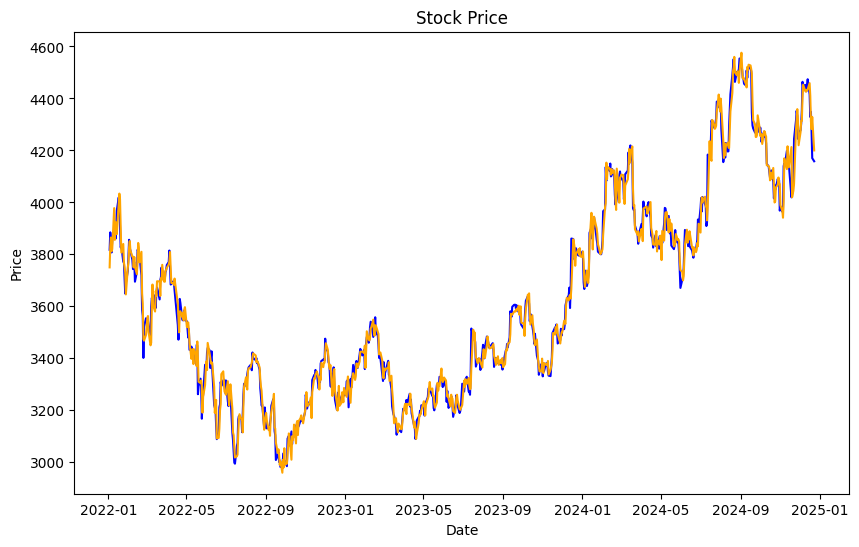

In [368]:
plt.figure(figsize=(10,6))
plt.plot(tcs_data['Close'], label='Close Price', color ='blue')
plt.plot(tcs_data['Open'], label = 'Open Price', color = 'orange')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [369]:
#Check Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(tcs_data['Close'])
print("ADF Statics :",result[0])
print ("p-value :",result[1])
if(result[1]<=0.05):
    print("The data is stationary")
else:
    print("The data is not stationary. Differencing required.")

ADF Statics : -1.4140599379564602
p-value : 0.5755173557109294
The data is not stationary. Differencing required.


In [370]:
#Differencing
tcs_data['Close_differencing']=tcs_data['Close'].diff().dropna()
#Checking data is stationary or not
result= adfuller(tcs_data['Close_differencing'].dropna())
print("ADF Statics :",result[1])
print("p-value :",result[1])
if(result[1]<=0.05):
    print("The data is stationary.")
else:
    print("The data is not stationary. Differencing might be required.")

ADF Statics : 0.0
p-value : 0.0
The data is stationary.


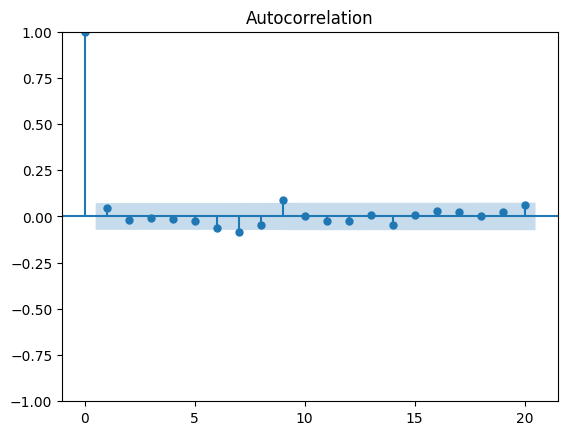

In [371]:
#Autocorrelation and Partial Autocorrelation
plot_acf(tcs_data["Close_differencing"].dropna(),lags=20)
plt.show()


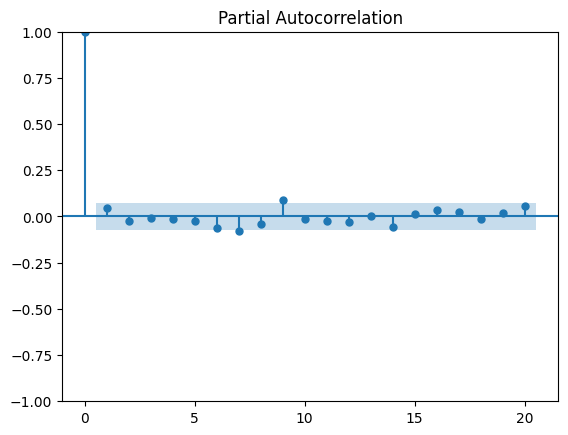

In [372]:
plot_pacf(tcs_data["Close_differencing"].dropna(),lags=20)
plt.show()

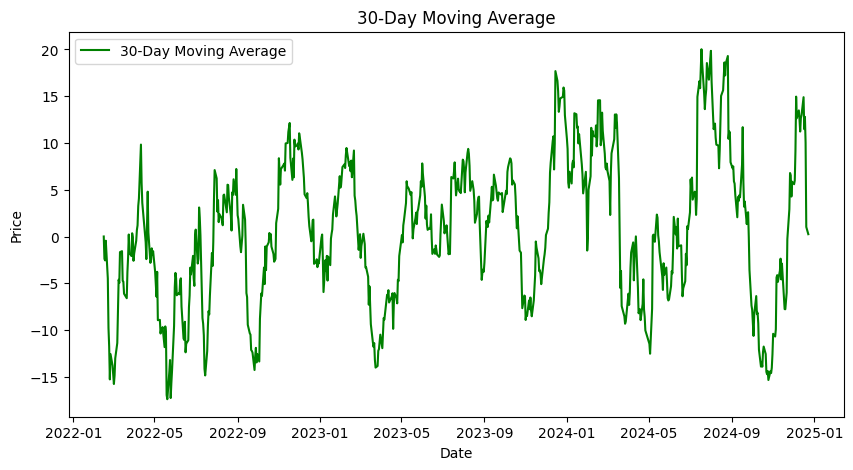

In [373]:
#Calculate 30 day Moving Average
tcs_data['30_day_MA'] = tcs_data['Close_differencing'].rolling(window=30).mean()

#Plotting the Moving Average
plt.figure(figsize=(10,5))
plt.plot(tcs_data['30_day_MA'],label ='30-Day Moving Average', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('30-Day Moving Average')
plt.legend()
plt.show()

In [388]:
#Fitting the ARIMA Model
model = ARIMA(tcs_data['Close'], order=(9,1,4))
arima_result = model.fit()
print(arima_result.summary())

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregres

                               SARIMAX Results                                
Dep. Variable:                 TCS.NS   No. Observations:                  734
Model:                 ARIMA(9, 1, 4)   Log Likelihood               -3869.438
Date:                Fri, 27 Dec 2024   AIC                           7766.877
Time:                        15:17:01   BIC                           7831.237
Sample:                             0   HQIC                          7791.703
                                - 734                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3421      0.844     -0.405      0.685      -1.997       1.313
ar.L2         -0.2202      0.688     -0.320      0.749      -1.569       1.129
ar.L3          0.0384      0.599      0.064      0.9

In [389]:
start_date = pd.to_datetime("2024-01-3")
end_date = pd.to_datetime("2024-12-23")


In [390]:
#Check if the dates are within the range of the index
if start_date not in tcs_data.index or end_date not in tcs_data.index:
    print(f"The start_date or end_date is not found in the tcs_data's index. Availabe dates are:")
    print(tcs_data.index.min(), "to", tcs_data.index.max())
else:
    predicted_data = arima_result.predict(start=start_date, end=end_date,typ="level")
    print(tcs_data['Close'].tail(10))
    print("\n Predicted Data")
    print(predicted_data)
    

Ticker           TCS.NS
Date                   
2024-12-10  4432.549805
2024-12-11  4427.450195
2024-12-12  4454.950195
2024-12-13  4473.899902
2024-12-16  4415.200195
2024-12-17  4328.500000
2024-12-18  4347.850098
2024-12-19  4271.899902
2024-12-20  4170.299805
2024-12-23  4158.299805

 Predicted Data
Date
2024-01-03    3784.585641
2024-01-04    3696.285995
2024-01-05    3664.764430
2024-01-08    3736.334950
2024-01-09    3683.223703
                 ...     
2024-12-17    4409.460850
2024-12-18    4334.698243
2024-12-19    4344.008772
2024-12-20    4267.845490
2024-12-23    4167.655129
Name: predicted_mean, Length: 239, dtype: float64


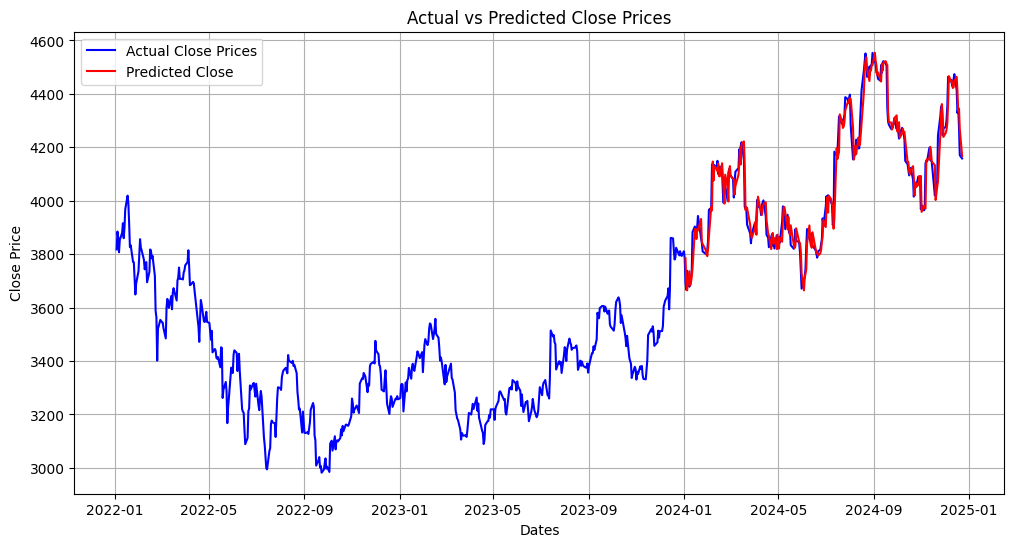

In [391]:
#Plot Actual and Predicted Data
plt.figure(figsize=(12,6))
plt.plot(tcs_data.index,tcs_data['Close'],label ='Actual Close Prices',color='blue')
plt.plot(predicted_data.index,predicted_data, label = 'Predicted Close', color='red')
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Dates")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Forecast next 30 days
forecast_steps =30
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=tcs_data.index[-1] +pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


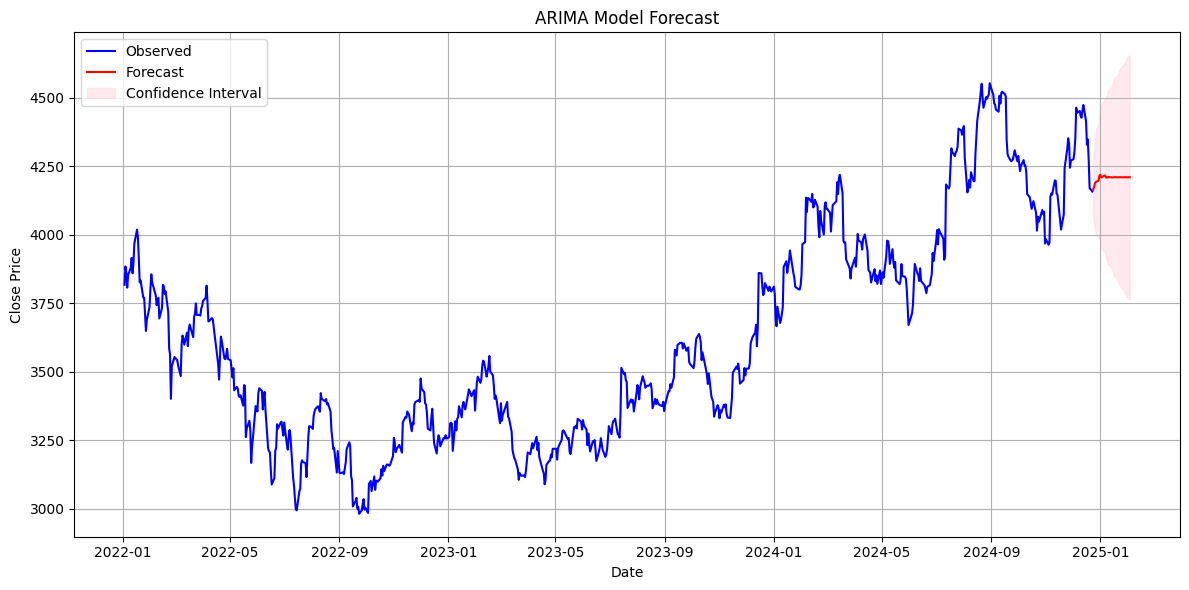

In [393]:

plt.figure(figsize=(12,6))
plt.plot(tcs_data.index, tcs_data['Close'], label ='Observed', color='blue')
plt.plot(forecast_index,forecast_mean, label='Forecast',color='red')
plt.fill_between(
    forecast_index,
    forecast_ci.iloc[:,0],
    forecast_ci.iloc[:,1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)

plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [394]:
# Ensure that the predictions and actual values are aligned and converted to numpy arrays
actual_values = tcs_data['Close'][-len(predicted_data):].values
predicted_values = predicted_data.values

# Calculate errors
mae = mean_absolute_error(actual_values, predicted_values)
mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

# Normalize errors to percentage
mean_actual = np.mean(actual_values)  
mae_percentage = (mae / mean_actual) * 100
rmse_percentage = (rmse / mean_actual) * 100

# Calculate accuracy
accuracy = 100 - mape

# Print results in percentage
print(f"Mean Absolute Error (MAE): {mae_percentage:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse_percentage:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")


Mean Absolute Error (MAE): 0.95%
Mean Absolute Percentage Error (MAPE): 0.95%
Root Mean Squared Error (RMSE): 1.31%
Model Accuracy: 99.05%
